<div style="line-height:0.45">
<h1 style="color:#0AE42F  "> Outliers detection </h1>
<div style="margin-top: 4px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> subplots + vstack
</span>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

In [2]:
np.random.seed(36)
normal_data = np.random.normal(loc=0, scale=1, size=1000)
outlier_data = np.random.normal(loc=10, scale=1, size=50)
data_sparse = np.concatenate([normal_data, outlier_data])
data_sparse

array([ 0.67641327,  1.52109919, -0.51187625, ..., 10.62096337,
       11.20614396, 10.21349554])

<h2 style="color:#0AE42F  ">  Isolation Forest </h2>
<div style="margin-top: -20px;">
It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and <br> 
the minimum values of the selected feature. <br>
The random partitioning (forest of random trees) produces shorter paths for anomalies. 
</div>

Text(0.5, 1.0, 'Outlier Detection with Isolation Forest')

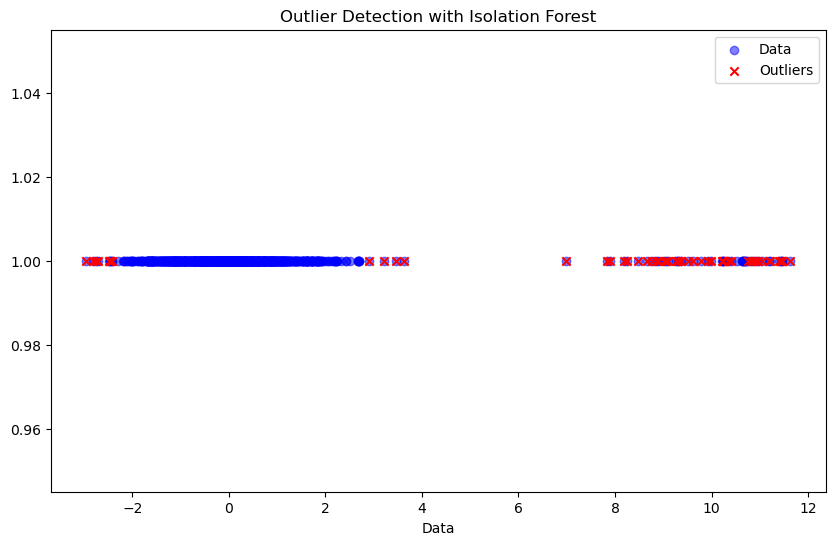

In [3]:
# Reshape the data as required by IsolationForest
data = data_sparse.reshape(-1, 1)

## Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)      #proportion of outliers
isolation_forest.fit(data)

### Predict outliers
outlier_pred = isolation_forest.predict(data)
outliers = data[outlier_pred == -1]
inliers = data[outlier_pred == 1]

####### Display outliers
plt.figure(figsize=(10, 6))
plt.scatter(data, np.ones(len(data)), label='Data', color='blue', alpha=0.5)
plt.scatter(outliers, np.ones(len(outliers)), label='Outliers', color='red', marker='x')
plt.xlabel('Data')
plt.legend()
plt.title('Outlier Detection with Isolation Forest')

In [4]:
okpoints = np.random.normal(loc=0, scale=1, size=(300, 2))
# Add outliers
outliers = np.array([[5, 5], [-5, -5]])
# Combine points
data = np.vstack([okpoints, outliers])

## Isolation Forest model
model = IsolationForest(contamination=0.2)  #contamination specifies the proportion of outliers
model.fit(data)

## Predict outliers
outlier_preds = model.predict(data)
outliers_detected_iso = data[outlier_preds == -1]

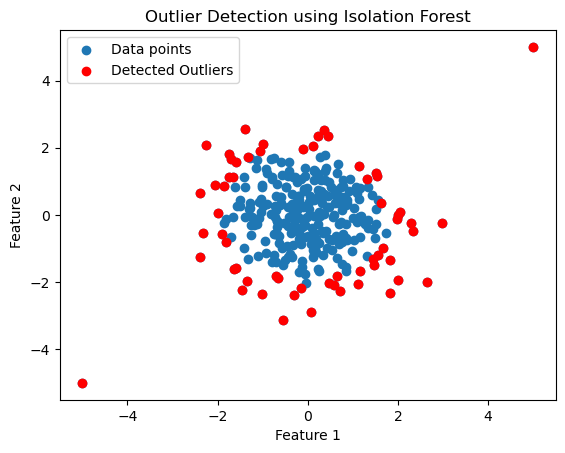

In [5]:
plt.scatter(data[:, 0], data[:, 1], label="Data points")
plt.scatter(outliers_detected_iso[:, 0], outliers_detected_iso[:, 1], color='r', label="Detected Outliers")
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using Isolation Forest');

<div style="line-height:0.45">
<h2 style="color:#0AE42F  ">  Local Outlier Factor (LOF) </h2>
<div style="line-height:1.2">
<div>
It measures the local deviation of the density of a given sample with respect to its neighbors. <br>
Locality is given by k-nearest neighbors, whose distance is used to estimate the local density. 
<div>

In [6]:
## Local Outlier Factor model
lof = LocalOutlierFactor(contamination=0.1) 
lof.fit(data)

outlier_preds_lof = lof.fit_predict(data)
outliers_detected_lof = data[outlier_preds_lof == -1]

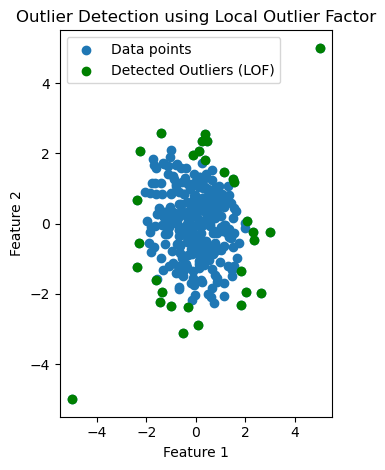

In [7]:
plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1], label="Data points")
plt.scatter(outliers_detected_lof[:, 0], outliers_detected_lof[:, 1], color='g', label="Detected Outliers (LOF)")
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using Local Outlier Factor');
plt.tight_layout()

<div style="line-height:0.45">
<h2 style="color:#0AE42F  "> Elliptic Envelope model</h2>
<div>
Robust Covariance model to detect outliers in a Gaussian distributed dataset.

In [8]:
cov_model = EllipticEnvelope(contamination=0.2)
cov_preds = cov_model.fit_predict(data)
cov_outliers = data[cov_preds == -1]

<h2 style="color:#0AE42F  "> One-Class SVM model </h2>
Estimate the support of a high-dimensional distribution.

In [9]:
svm_model = OneClassSVM(nu=0.2)
svm_preds = svm_model.fit_predict(data)
svm_outliers = data[svm_preds == -1]

<h2 style="color:#0AE42F  "> Density-Based Spatial Clustering of Applications with Noise (DBSCAN) </h2>
<div style="margin-top: -20px;">
It groups data points based on their density and proximity to each other. It forms clusters by identifying core points (with sufficient nearby points) and expanding them to reach neighboring points. Points not part of any cluster are classified as noise or outliers.
</div>

In [10]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_preds = dbscan_model.fit_predict(data)
dbscan_outliers = data[dbscan_preds == -1]

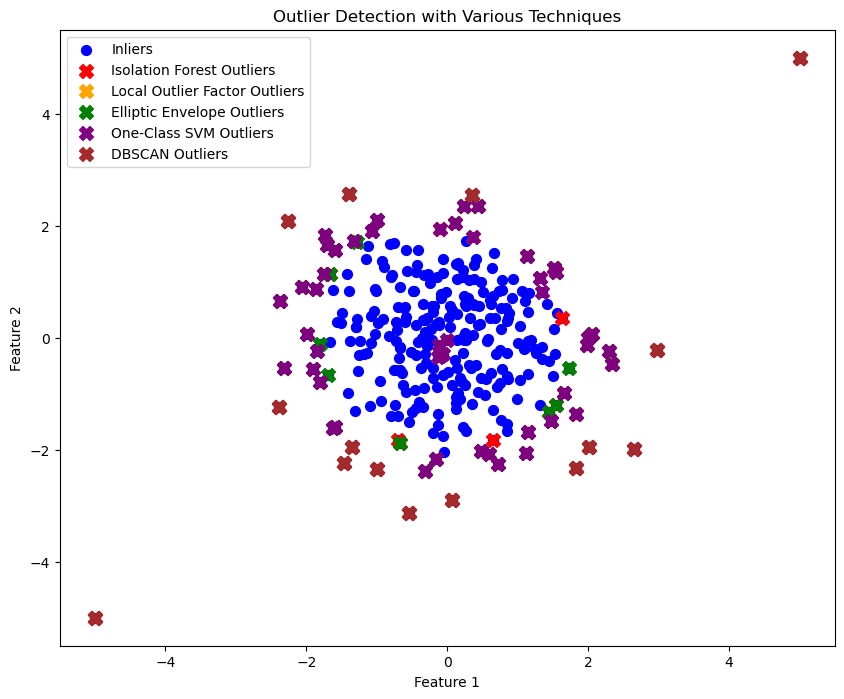

In [11]:
############## Visualize outliers of each method
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], label='Inliers', s=50, color='blue')
plt.scatter(outliers_detected_iso[:, 0], outliers_detected_iso[:, 1], label='Isolation Forest Outliers', 
            s=100, color='red', marker='X')
plt.scatter(outliers_detected_lof[:, 0], outliers_detected_lof[:, 1], label='Local Outlier Factor Outliers', 
            s=100, color='orange', marker='X')
plt.scatter(cov_outliers[:, 0], cov_outliers[:, 1], label='Elliptic Envelope Outliers', s=100, color='green', marker='X')
plt.scatter(svm_outliers[:, 0], svm_outliers[:, 1], label='One-Class SVM Outliers', s=100, color='purple', marker='X')
plt.scatter(dbscan_outliers[:, 0], dbscan_outliers[:, 1], label='DBSCAN Outliers', s=100, color='brown', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection with Various Techniques')
plt.legend()
#plt.grid(True)
plt.show()

In [12]:
def remove_outliers_iqr(data, threshold=1.5):
    """ Remove outliers from a 2D data array using the Interquartile Range (IQR) method.\\
    The IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data.\\
    It is defined as Q3 - Q1.\\
    Outliers are the data points that fall below Q1 - threshold*IQR or above Q3 + threshold*IQR.\\
    The threshold value controls the number of outliers removed.\\
    A higher threshold value will remove fewer outliers, and viceversa. 
    
    Parameters:
            - The input 2D data array of shape (n_samples, n_features) [numpy.ndarray].
            - The threshold value to use for the IQR method. This controls the number of outliers removed [float].
    
    Details:
        1) numpy percentile param axis=0 [vertical axis] to compute the percentile along each feature (column)\\
            of the data array separately. 
        2) numpy all() is necessary to computes the logical AND operation for all elements in a NumPy array,\\
            to make the shapes consistent.
            Returns a boolean value to test whether all elements in the array satisfy the given condition on bounds.
        3) axis=1 [horizontal axis] means that the function will check whether the condition is applied element-wise along each row.\\
            Check for each row of the 2D array, which has rows representing data points and columns representing features. 

    Returns:
        "keep" is a 1D boolean array of shape (n_samples,) indicating which rows of the input array should be kept [numpy.ndarray].\\
        It has the the same length as the number of rows in the input array.\\
        True at index i means that the "ith" row of the input array should be kept, otherwise the row should be removed. 
    """
    q1 = np.percentile(data, 25, axis=0) #1)
    q3 = np.percentile(data, 75, axis=0)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    keep = np.all((data >= lower_bound) & (data <= upper_bound), axis=1) #2)#3)
    
    return keep

#data_iqr_removed = np.apply_along_axis(remove_outliers_iqr, 0, data) #wrong, lead to ValueError!
data_iqr_removed = data[remove_outliers_iqr(data)]


In [13]:
def impute_outliers_with_median(data, outliers):
    """ Impute outliers in a 1D data array by replacing them with the median value of a reference outlier array.\\
    Outliers are defined as any data points in the input array that fall below the minimum or\\ 
    above the maximum value of the reference array. 
    
    Parameters:
        - Input 1D data array to be imputed [numpy.ndarray].
        - Reference 1D outlier array used to compute the median value [numpy.ndarray].    
    
    Returns:
        Copy of input with outliers replaced by the median value of the reference array [numpy.ndarray].
    """
    data = data.copy()
    data[data < outliers.min()] = np.median(outliers)
    data[data > outliers.max()] = np.median(outliers)
    return data


def bin_outliers(data, num_bins=5):
    """ Bin outliers in a 1D data array into predefined bins.\\
    Outliers are defined as any data points that fall below the minimum or above the maximum value of the data. 
    
    Parameters:
        - Input 1D data array to be binned [numpy.ndarray].
        - Number of bins to use for binning the data [int, optional (default=5)].
    
    Details:
        - np linspace function to compute the bin boundaries;
        - digitize assign each element of the data array to its corresponding bin number;
    
    Returns:
        1D integer array of the same shape as the input array, indicating the bin number for each element [numpy.ndarray]
    """
    bins = np.linspace(data.min(), data.max(), num_bins)
    return np.digitize(data, bins)


def apply_log_transformation(data):
    """ Apply a log transformation to a 1D data array.\\
    The natural logarithm it is sometimes used to make the distribution more suitable for statistical analysis,\\
    since it is a monotonically increasing function that maps positive real numbers to the set of real numbers. 
    
    Parameters:
        The 1D data array to be transformed [numpy.ndarray]
    
    Returns:
        Copy with elements transformed by the natural logarithm [numpy.ndarray].
    """
    return np.log(data.copy())

In [14]:
data_imputed_median = np.apply_along_axis(impute_outliers_with_median, 0, data, outliers)
data_binned = np.apply_along_axis(bin_outliers, 0, data)
data_log_transformed = apply_log_transformation(data)

/tmp/ipykernel_322622/467009113.py:48: RuntimeWarning: invalid value encountered in log
  return np.log(data.copy())


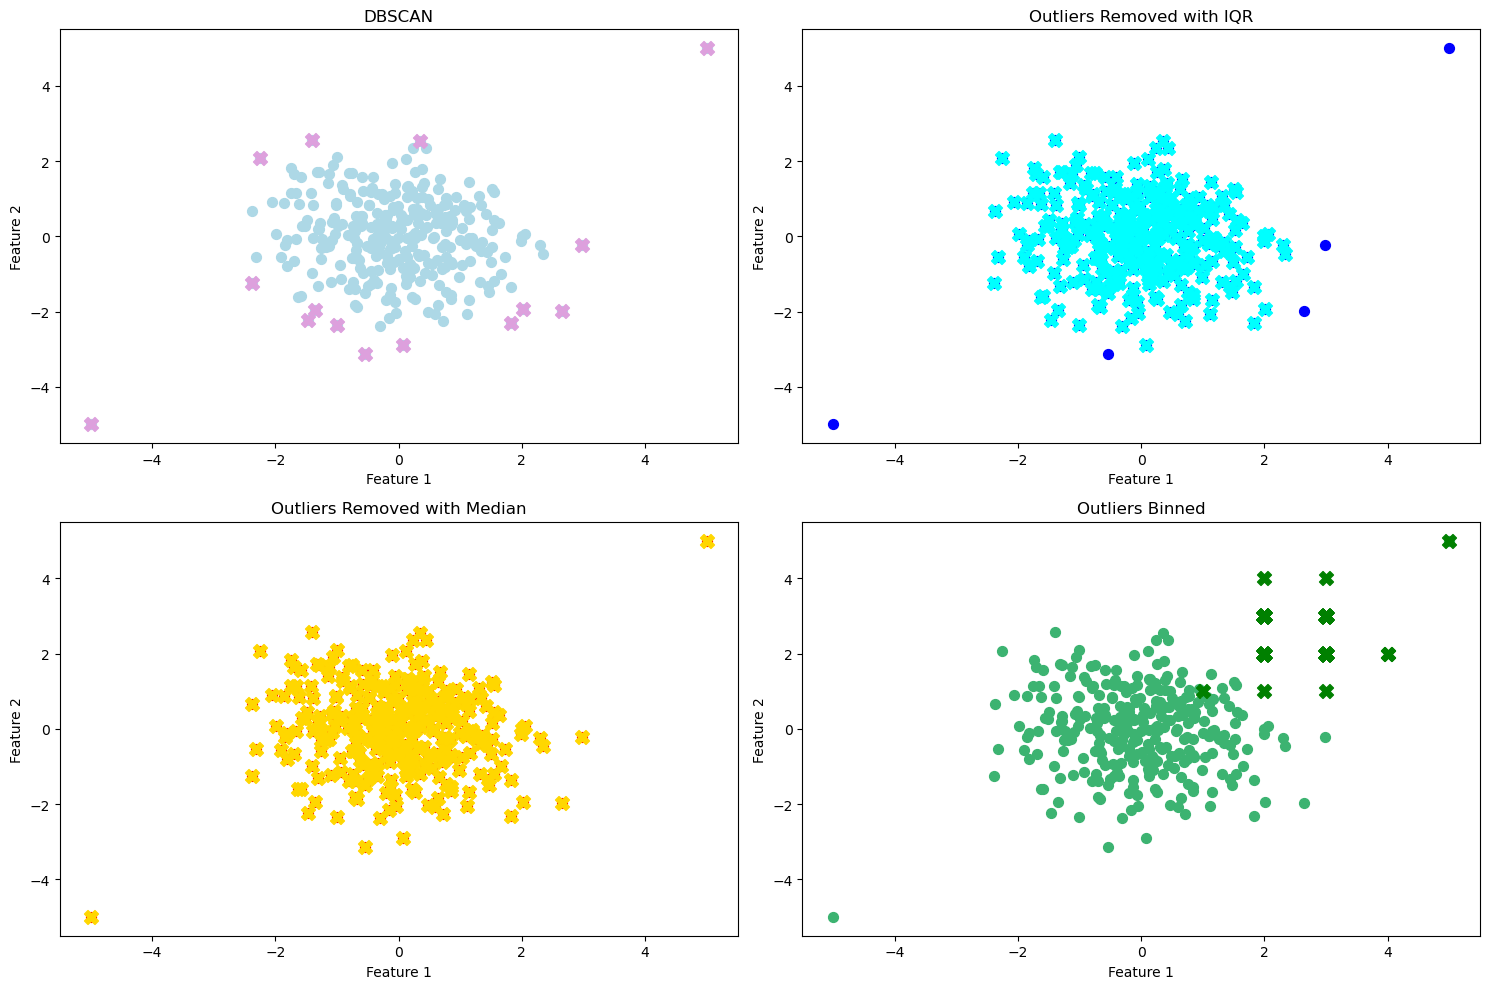

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='lightblue')
plt.scatter(dbscan_outliers[:, 0], dbscan_outliers[:, 1], label='DBSCAN Outliers', s=100, color='plum', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN')

plt.subplot(2, 2, 2)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='blue')
plt.scatter(data_iqr_removed[:, 0], data_iqr_removed[:, 1], label='IQR Outliers Removed', s=100, color='cyan', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outliers Removed with IQR')

plt.subplot(2, 2, 3)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='red')
plt.scatter(data_imputed_median[:, 0], data_imputed_median[:, 1], label='Mean Outliers Removed', s=100, color='gold', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outliers Removed with Median')

plt.subplot(2, 2, 4)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='mediumseagreen')
plt.scatter(data_binned[:, 0], data_binned[:, 1], label='Outliers Binned', s=100, color='green', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outliers Binned')
plt.tight_layout()
plt.show()


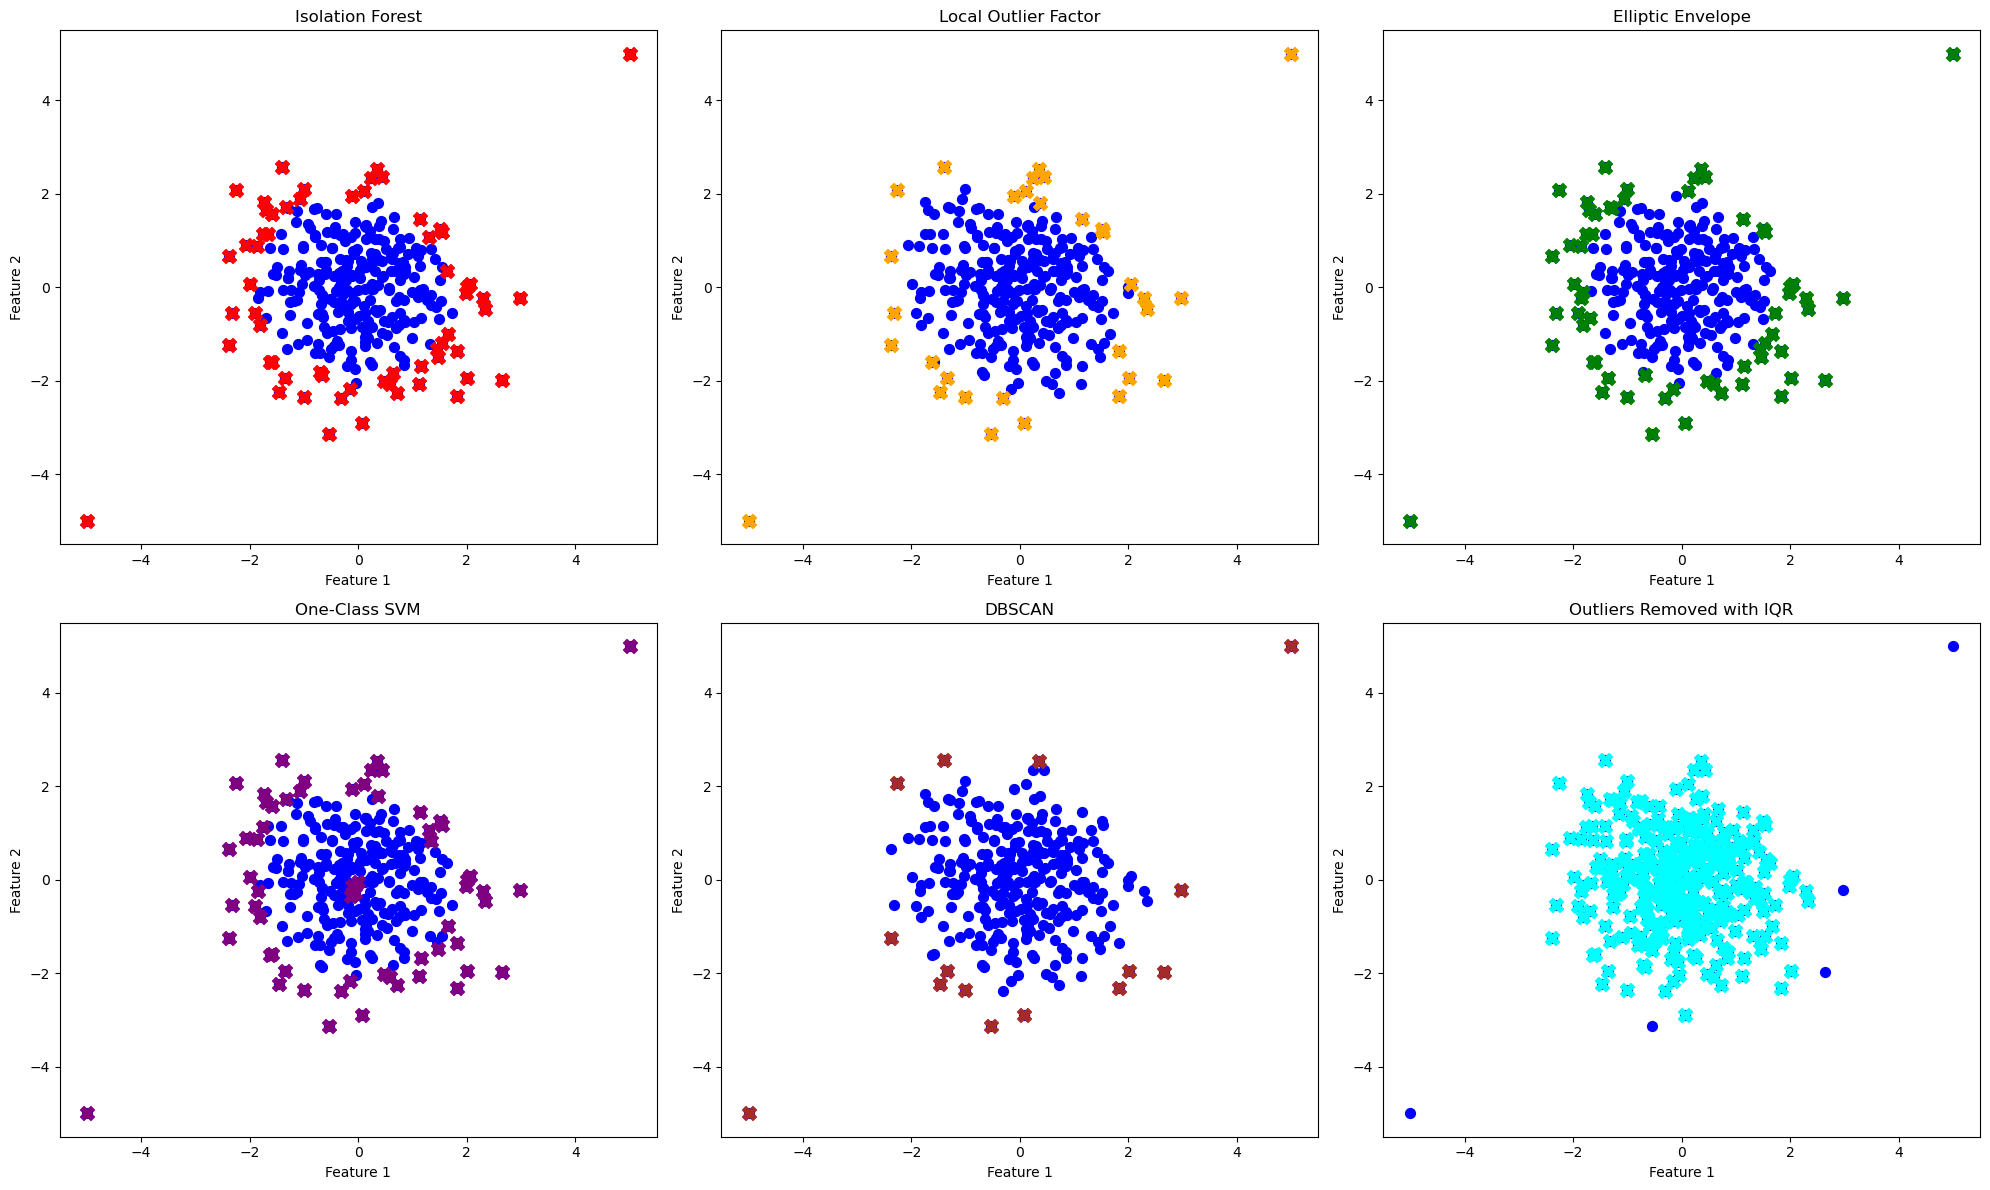

In [17]:
""" Plotting the data and detected outliers """

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='blue')
plt.scatter(outliers_detected_iso[:, 0], outliers_detected_iso[:, 1], label='Isolation Forest Outliers', s=100, color='red', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest')

plt.subplot(2, 3, 2)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='blue')
plt.scatter(outliers_detected_lof[:, 0], outliers_detected_lof[:, 1], label='LOF Outliers', s=100, color='orange', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Local Outlier Factor')

plt.subplot(2, 3, 3)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='blue')
plt.scatter(cov_outliers[:, 0], cov_outliers[:, 1], label='Elliptic Envelope Outliers', s=100, color='green', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Elliptic Envelope')

plt.subplot(2, 3, 4)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='blue')
plt.scatter(svm_outliers[:, 0], svm_outliers[:, 1], label='One-Class SVM Outliers', s=100, color='purple', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('One-Class SVM')

plt.subplot(2, 3, 5)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='blue')
plt.scatter(dbscan_outliers[:, 0], dbscan_outliers[:, 1], label='DBSCAN Outliers', s=100, color='brown', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN')

plt.subplot(2, 3, 6)
plt.scatter(data[:, 0], data[:, 1], label='Original Data', s=50, color='blue')
plt.scatter(data_iqr_removed[:, 0], data_iqr_removed[:, 1], label='IQR Outliers Removed', s=100, color='cyan', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outliers Removed with IQR')

plt.tight_layout()
plt.show()